# In class project for Monday, November 23 (due Wednesday 12/2)

#### Set-up

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Optical Character Recognition

As a prototypical image analysis and categorization task we look at identifying the correct digit (0..9) in digital images of handwritten digits. For this project we'll use the digits dataset built into sklearn.

### sklearn digits dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

#### What is type of digits?

In [3]:
type(digits)

sklearn.utils.Bunch

A Bunch object is a custom version of a pandas object (https://pandas.pydata.org/docs/user_guide/index.html)
At a basic level a Bunch object is just a special tpye of dictionary and can be used as such.

In [4]:
isinstance(digits, dict)

True

In [5]:
for d in digits:
    print(d,type(digits[d]))

data <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
frame <class 'NoneType'>
feature_names <class 'list'>
target_names <class 'numpy.ndarray'>
images <class 'numpy.ndarray'>
DESCR <class 'str'>


In [6]:
print(digits['DESCR'])
#print(digits['DESCR'][0:500])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
d1_data  = (digits['data'][0])
d1_image = (digits['images'][0])
d1_target = (digits['target_names'][0])

In [8]:
print(digits['images'][0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


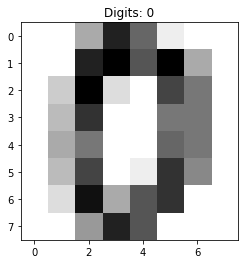

In [9]:
    plt.imshow(d1_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Digits: {d1_target}')
    plt.show()

### a) Describe and visualize the data, for example how many samples, feature and target  dimensionality?  Visualize some of the digits (<=100). 


The properties of digits are: data, target, frame, feature_names, target_names, images, and DESCR.

The total number of samples is 1797. 

The number of features for a digits is: 

(1797, 8, 8); Since it is in a 8 x 8 orientation, then there is a total of 64 features per digit. 

Looking at the feature names: 

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_

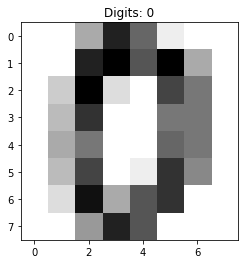

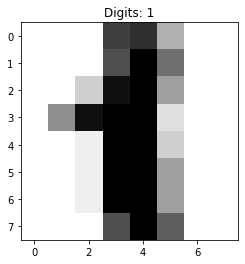

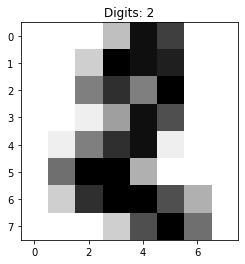

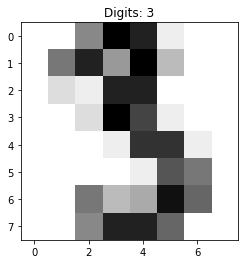

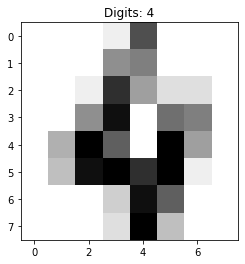

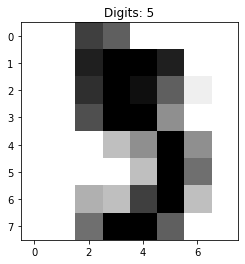

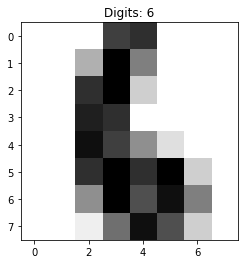

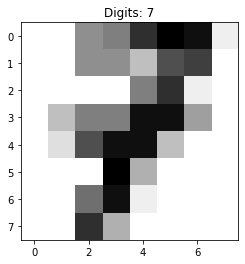

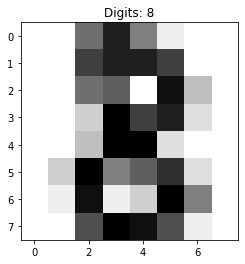

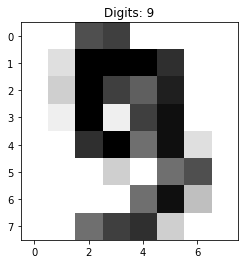

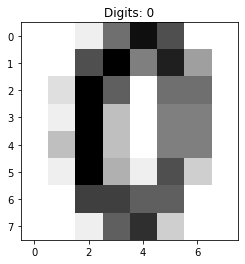

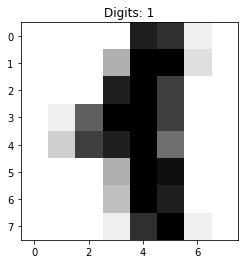

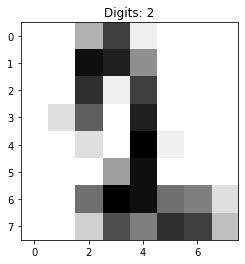

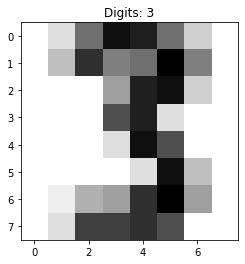

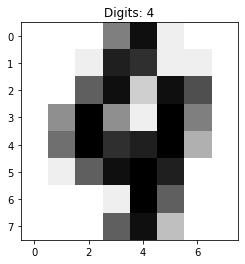

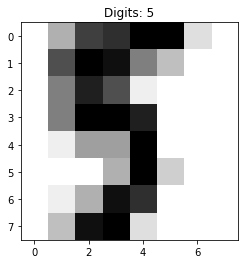

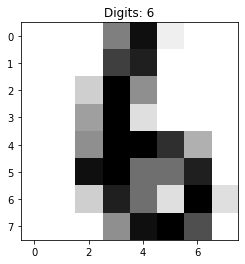

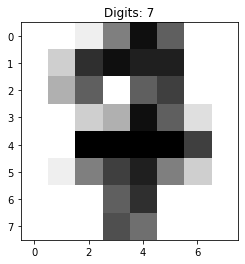

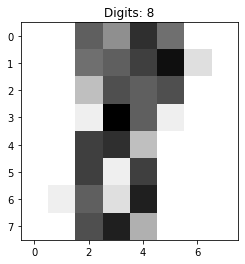

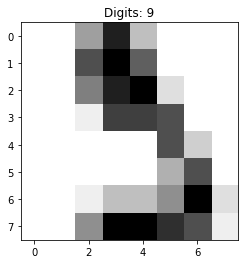

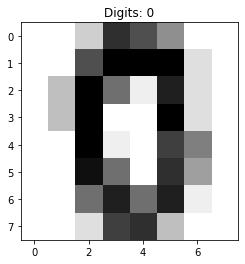

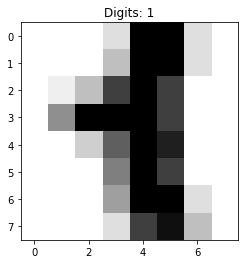

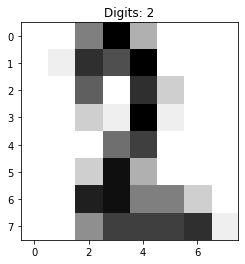

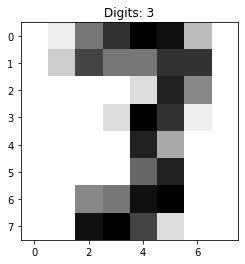

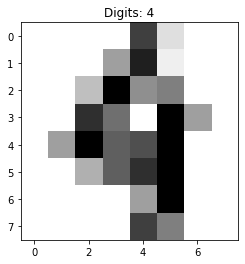

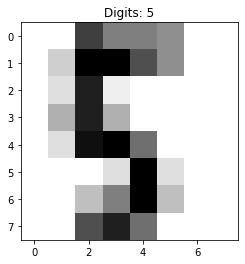

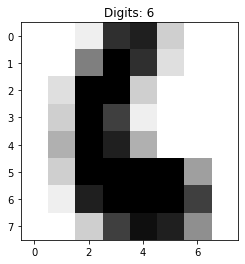

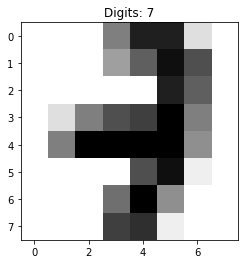

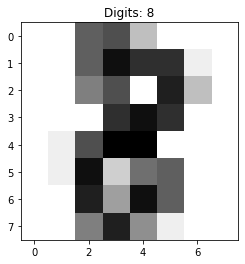

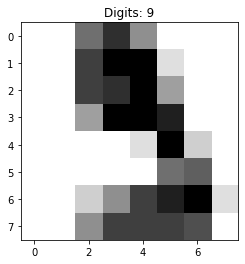

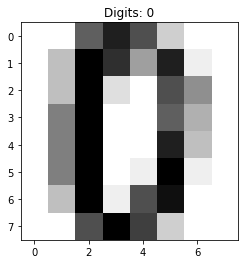

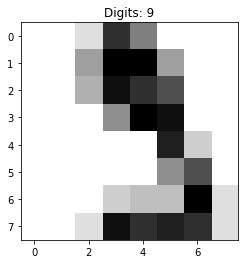

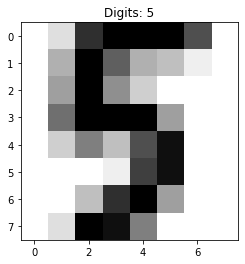

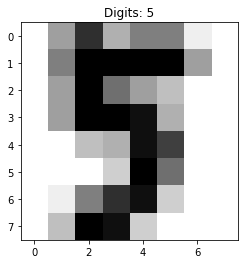

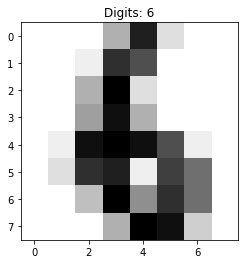

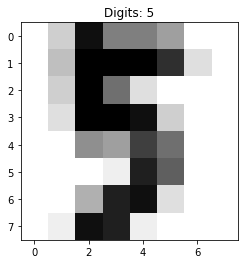

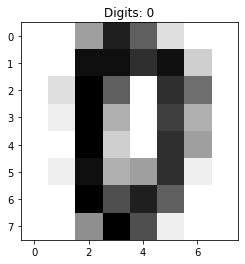

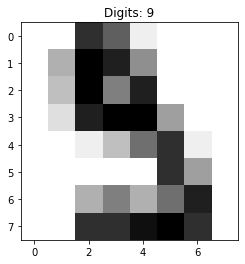

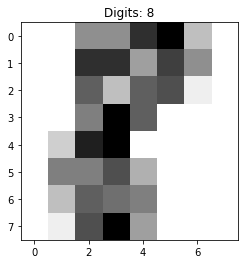

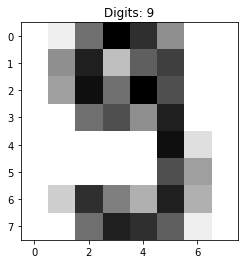

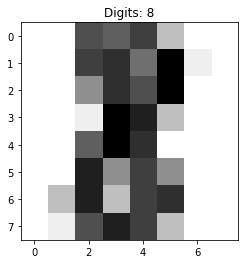

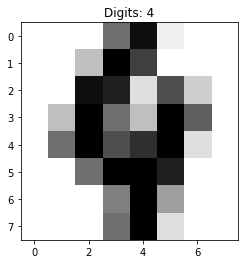

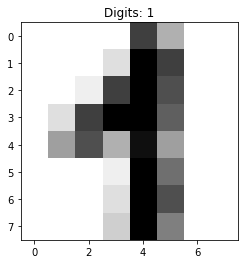

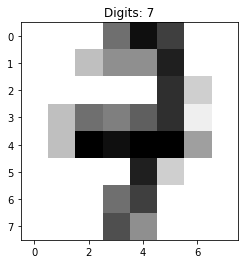

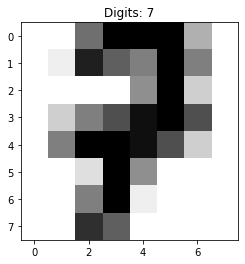

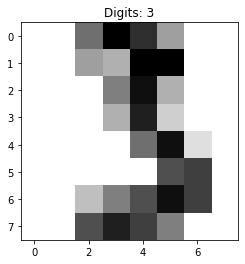

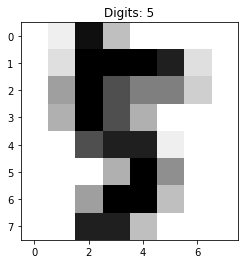

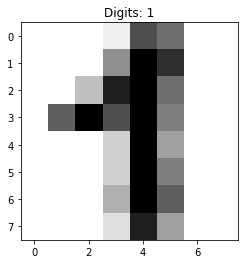

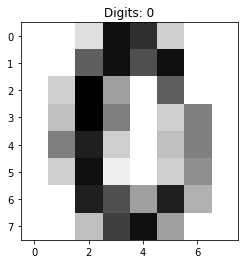

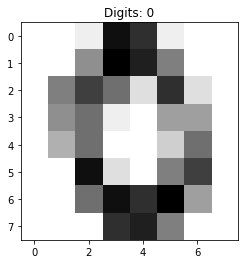

In [10]:
# for d in digits: 
#     print(d)

d_data = digits['data']
d_target = digits['target']
d_frame = digits['frame']
d_fn = digits['feature_names']
d_tn = digits['target_names']
d_images = digits['images']

print(f'''
The properties of digits are: data, target, frame, feature_names, target_names, images, and DESCR.

The total number of samples is {len(d_data)}. 

The number of features for a digits is: 

{d_images.shape}; Since it is in a 8 x 8 orientation, then there is a total of {d_images.shape[1] * d_images.shape[2]} features per digit. 

Looking at the feature names: 

{d_fn}

, they appear to be in numerated pixels starting from 00 to 77 which supports the value of 64 features. 

The target dimensionality is therefore 64 and the feature dimensionality is 3 (x and y component + intensity value). 

Looking at the image property: 

{d_images[0]}

The image properties appears to be containing the pixels needed to generate the digits, with the value 0 being white space and any other values being a shade of black or in better terms, the higher the value, the darker the pixel. 

Visualizing first 50 digits: 
''')

for i in np.arange(0, 50): 
    plt.figure()
    plt.imshow(d_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Digits: {d_target[i]}')
    plt.show()


### b) How useful is it to graph the dependency of the target on each feature or a pair of features?

Pick 2 features (pixels) and plot in two dimensions. Can you learn anything?

Answer: It might be quite useful to graph the dependency of the target on each feature or a pair of features. In this case, I plotted feature 'pixel_2_3' and 'pixel_3_4' against each other and there seem to be a clear slight dependence with one another though not to a large extent. If I were to plot this for the rest of the combination of features, it may be possible to determine a small subset of features that contains every bit of information that is needed to determine the target. 

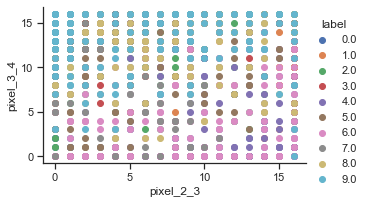

In [11]:
import pandas as pd 
import seaborn 
seaborn.set(style = 'ticks')

digits_data = digits.data
digits_label = digits.target 
labels = np.reshape(digits_label, (1797,1)) # To concatenate with with the data to create a data frame 
final_digits_data = np.concatenate([digits_data, labels], axis = 1) # Creating dataframe that has both the data and the respective labels 

digits_dataset = pd.DataFrame(final_digits_data) # Representing data in a table format 
features = digits.feature_names
features_label = np.append(features, 'label')
digits_dataset.columns = features_label # combining features with the dataframe to get a complete datasets with data, features label as well as target label 

fg = seaborn.FacetGrid(data = digits_dataset, hue = 'label', aspect = 1.5)
fg.map(plt.scatter, 'pixel_2_3', 'pixel_3_4').add_legend()
plt.show()

### c) Apply PCA to the digits data set. Keep two dimensions and create a plot. What if anything can you learn from your result?

## Principal Component Analysis (PCA)

* http://scikit-learn.org/stable/modules/decomposition.html
* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


Mean = 8.649483775599439e-19
Standard Deviation =  0.9762812094883324

Explained variation per principal components:[0.12033916 0.09561054]

This tells us that principal compnent 1 holds ~12.03% of information while principal component 2 holds ~9.56% of the information. This also tells us that a 78.41% of information is lost upon projecting 64 dimensional data to a two dimensional. 



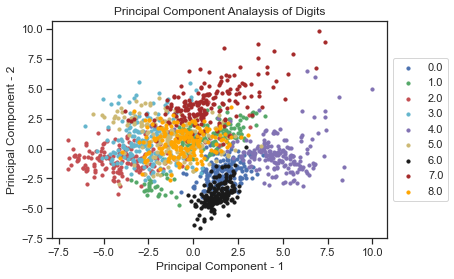


Based on projecting the data onto a two dimensional space, we can see that there is some form of linear seperation between the classes of labels creating groups such as group 1 (black, blue, purple) and group 2 being the remaining classes of labels. However, it is clear that projecting on to a two dimensional space introduces inaccuracies to a large extent. 



In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

x = digits_dataset.loc[:, features].values 
x = StandardScaler().fit_transform(x) # normalizing the features 
#print(x.shape)
print(f'Mean = {np.mean(x)}\nStandard Deviation =  {np.std(x)}') # Checking if mean = 0 and std = 1 
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
normalized_digits = pd.DataFrame(x, columns = feat_cols) # Convert normalized features into table using dataframe 

## Projecting 64 dimensional data to two dimensional principal components 
pca_digits = PCA(n_components = 2) # we want it to get down to 2 dimensions
principalComponents_digits = pca_digits.fit_transform(x) 
principal_digits_df = pd.DataFrame(data = principalComponents_digits, columns = ['pc1', 'pc2'])

print(f'''
Explained variation per principal components:{pca_digits.explained_variance_ratio_}

This tells us that principal compnent 1 holds ~12.03% of information while principal component 2 holds ~9.56% of the information. This also tells us that a 78.41% of information is lost upon projecting 64 dimensional data to a two dimensional. 
''')

plt.figure()
targets = [] 
for n in np.arange(0, len(digits_dataset.label)): 
    targets.append(digits_dataset.label[n])
targets = np.unique(targets)
colors = ['b','g','r','c','m','y','k','brown','orange']
for targets, colors in zip(targets,colors):
    indicesToKeep = digits_dataset['label'] == targets
    plt.scatter(principal_digits_df.loc[indicesToKeep, 'pc1'], principal_digits_df.loc[indicesToKeep, 'pc2'], c = colors, s = 10, label = targets)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.title('Principal Component Analaysis of Digits')
plt.show()

print('''
Based on projecting the data onto a two dimensional space, we can see that there is some form of linear seperation between the classes of labels creating groups such as group 1 (black, blue, purple) and group 2 being the remaining classes of labels. However, it is clear that projecting on to a two dimensional space introduces inaccuracies to a large extent. 
''')


### d) Classify the digit images with a support vector machine

## Support vector machines (SVM)

* https://scikit-learn.org/stable/modules/svm.html

## Model evaluation and scoring

* https://scikit-learn.org/stable/modules/model_evaluation.html

## Confusion matrix

* https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

#### Tasks:
1. Learn about SVMs in sklearn. What parameters does this method take?

    Answer: 
    
    The following parameters are used in SVC:

    - **Cfloat**: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
    - **kernel**: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}.Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
    - **degree**: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
    - **gamma**: {‘scale’, ‘auto’} or float. This is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
        - if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
        - if ‘auto’, uses 1 / n_features.
    - **coef0**: Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.
    - **shrinking**: Whether to use the shrinking heuristic.
    - **probability**: Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict.
    - **tol**: Tolerance for stopping criterion.
    - **cache_size**: Specify the size of the kernel cache (in MB).
    - **class_weight**: dict or ‘balanced’. Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    - **verbose**: Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.
    - **max_iter**: Hard limit on iterations within solver, or -1 for no limit.
    - **decision_function_shape**: {‘ovo’, ‘ovr’}. Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification.
    - **break_ties**: If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned. Please note that breaking ties comes at a relatively high computational cost compared to a simple predict.
    - **random_state**: int or RandomState instance. Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls.

2. Split your data into a training set and test set.
    
    Answer: See code below
    
3. Think about how to report accuracy for your model? Overall accuracy? How do the concepts of true negatives, false positives, false negatives and true positives apply to this problem? What is a confusion matrix?

    Answer: 
    
    Reporting accuracy can be done in three way; **Accuracy**, **Precision**, and **Recall**. 
    
    *Accuracy* is defined as the percentage of correct predicitons for the test data. 
    
    *Precision* is defined as the fraction of relevant examples (true positives) among all of the examples which were predicted to belong in a certain class. 
    
    *Recall* is defined as the fraction of examples which were predicted to belong to a class with respect to all of the examples that truly belong in the class. 

    To report overall accuracy, we would use the f-score which is a combination of *precision* and *recall* metrics. The concepts of true negatives, false positives, false negatives and true positives apply to this problem just as it would for any other problem. This means that predicting an observation and checking if it actually belongs to the class or not. A quick and dirty explanation is as such: 

    - True positives are when you predict an observation belongs to a class and it actually does belong to that class.
    - True negatives are when you predict an observation does not belong to a class and it actually does not belong to that class.
    - False positives occur when you predict an observation belongs to a class when in reality it does not.
    - False negatives occur when you predict an observation does not belong to a class when in fact it does.

    And these four outcomes are plotted onto the confusion matrix with each cell corresponding to a specific results. 
    ### View output below for example of f-score and confusion matrix for this model


4. How accurate is your learning model? How does accuracy depend on the parameters of the SVM?

    Answer: 

    Based on the metrics accuracy score, my learning model has a ~98.15% accuracy. The accuracy will largely depend on the **kernel**, **Cfloat**, and **gamma** parameters. 
    
    **For Kernel**:
    The main function of the kernel is to transform the given dataset input data into the required form. Depending on the data, polynomial and RBF kernels may be useful for non-linear hyperplane wheras in this case I used the linear kernel. Typically, more complex kernel is used for classes that are curved or nonlinear and depending on which kernel is being used, it could result in a more or less accurate classifier. 
    
    **For Cfloat**: 
    Cfloat is used to maintain regularization and could also be coined as the penalty parameter which represents misclassification or error term. Basically it tells the SVM how much error is the limit. A smaller value creates a small-margin hyperplane and a larger value creates a larger-margin hyperplane, thus affecting the accuracy of th classifier. 

    **For Gamma**: 
    Lower value of gamma will fit the training dataset loosely and higher value will exactly fit the training dataset, which causes over-fitting. Depending on the value of gamma used, it will affect the accuracy of the classifier.   


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Splitting data into training and test set 
# The values chosen will be 70% training and 30% test 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3,random_state=109) 
clf = svm.SVC(kernel = 'linear') # Creating svm classifier 
clf.fit(X_train, y_train) # Train the model using the training sets 

# Predicting response for test dataset 
y_pred = clf.predict(X_test)

# Checking accuracy using metrics class 
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
# Precision: {metrics.precision_score(y_test, y_pred, average = 'micro')}
# Recall: {metrics.recall_score(y_test, y_pred, average = 'micro')}

print(f'''
Classification Report: 

{metrics.classification_report(y_test, y_pred)}

Confusion Matrix: 

{metrics.confusion_matrix(y_test, y_pred, labels=range(digits.target_names.shape[0]))}
''')



Accuracy: 0.9814814814814815

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        51
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        48
           5       0.96      0.98      0.97        49
           6       0.98      0.98      0.98        58
           7       1.00      0.98      0.99        64
           8       0.97      0.95      0.96        60
           9       0.96      0.94      0.95        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Confusion Matrix: 

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]


### e) Classify the digit images with a random forest model

## Random forests

* https://scikit-learn.org/stable/modules/ensemble.html#forest

#### Tasks:
1. Learn about Random forests in sklearn. What parameters does this method take?
    
    Answer: 
    
    The parameters for Random forests are as follow: 
    - n_estimators 
    - criterion
    - max_depth
    - min_samples_split
    - min_samples_leaf 
    - min_weight_fraction_leaf
    - max_features
    - max_leaf_nodes
    - min_impurity_decrease 
    - min_impurity_split 
    - bootstrap 
    - oob_score 
    - n_jobs
    - random_state 
    - verbose
    - warm_start 
    - class_weight
    - dicts
    - ccp_alpha 
    - max_samples

2. Split your data into a training set and test set.

    Answer: See code below 

3. Think about how to report accuracy for your model? Overall accuracy? How do the concepts of true negatives, false positives, false negatives and true positives apply to this problem? What is a confusion matrix? 

    Answer: I will still use the same method used in the previous section. Meaning we will take a look at accuracy, precision, recall, and for overall accuracy, f-score. The concepts of true and false positives or negatives still remains the same as it is dependent on the final predicted value and comparing it with the actual data. The confusion matrix will show a compact result of that. 

4. How accurate is your learning model? How does accuracy depend on the parameters of the Random forests?

    Answer: The learning model turned up with a 98% accuracy with a fairly high f-score as well. I think accuracy greatly depends on three parameters, n_estimators, min_samples_split, and max_depth. These 3 parameters are what determines the quality of a leaf node as well as the number of trees to vote into a final prediction, thus affecting the accuracy at the end. If we let there be more trees and more information per node, we will gain a much more accurate prediction. 



Accuracy: 0.9777777777777777

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        51
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        48
           5       0.96      0.98      0.97        49
           6       0.98      0.98      0.98        58
           7       1.00      0.98      0.99        64
           8       0.97      0.95      0.96        60
           9       0.96      0.94      0.95        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Confusion Matrix: 

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]

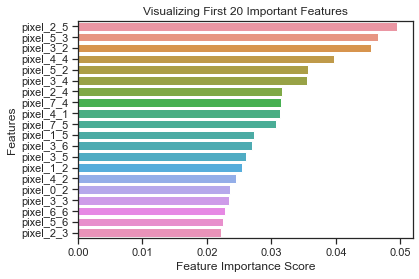

In [24]:
from sklearn.ensemble import RandomForestClassifier
#print(digits_dataset)

Xx = digits_dataset[digits.feature_names]
Yy = digits_dataset['label']

# Splitting dataset into training and test set
# 70% training and 30% test 
Xx_train, Xx_test, Yy_train, Yy_test = train_test_split(Xx, Yy, test_size=0.3) 

# Creating Gaussian Classifier
clff = RandomForestClassifier(n_estimators = 100) 

# Training the model and predicting y with test x 
clff.fit(Xx_train, Yy_train)
Yy_pred = clff.predict(Xx_test)

# Getting accuracy value
print(f'''
Accuracy: {metrics.accuracy_score(Yy_test, Yy_pred)}

Classification Report: 

{metrics.classification_report(y_test, y_pred)}

Confusion Matrix: 

{metrics.confusion_matrix(y_test, y_pred, labels=range(digits.target_names.shape[0]))}
''')

# Looking at important features 
feature_imp = pd.Series(clff.feature_importances_,index=digits.feature_names).sort_values(ascending=False)
#print(feature_imp)

plt.figure()
seaborn.barplot(x = feature_imp[0:20], y = feature_imp.index[0:20])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing First 20 Important Features")
plt.show()
